In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(arrow))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”


In [2]:
# Paths to parquet files to generate QC report
path_to_orig_plate4 <- file.path("./data/converted_profiles/localhost231120090001_converted.parquet")
path_to_cleaned_plate4 <- file.path("./data/cleaned_profiles/localhost231120090001_cleaned.parquet")

# Output path for bar chart
orig_plate4_output_file <- file.path(paste0("./qc_figures/localhost231120090001_orig_plate4_platemap.png"))

# Output path for platemap
clean_plate4_output_file <- file.path(paste0("./qc_figures/localhost231120090001_cleaned_plate4_platemap.png"))

In [3]:
# Read in CSV files
orig_df <- arrow::read_parquet(path_to_orig_plate4)
cleaned_df <- arrow::read_parquet(path_to_cleaned_plate4)

# Assuming your dataframe is called 'orig_df'
filtered_cleaned_df <- cleaned_df %>%
  group_by(Image_Metadata_Well) %>%
  summarize(Metadata_Count_Per_Well = n())

# Assuming your dataframe is called 'orig_df'
filtered_orig_df <- orig_df %>%
  group_by(Image_Metadata_Well) %>%
  summarize(Metadata_Count_Per_Well = n())

dim(filtered_cleaned_df)      
head(filtered_cleaned_df)

[1] 60  2

Image_Metadata_Well,Metadata_Count_Per_Well
<chr>,<int>
B02,284
B03,395
B04,321
B05,421
B06,359
B07,322


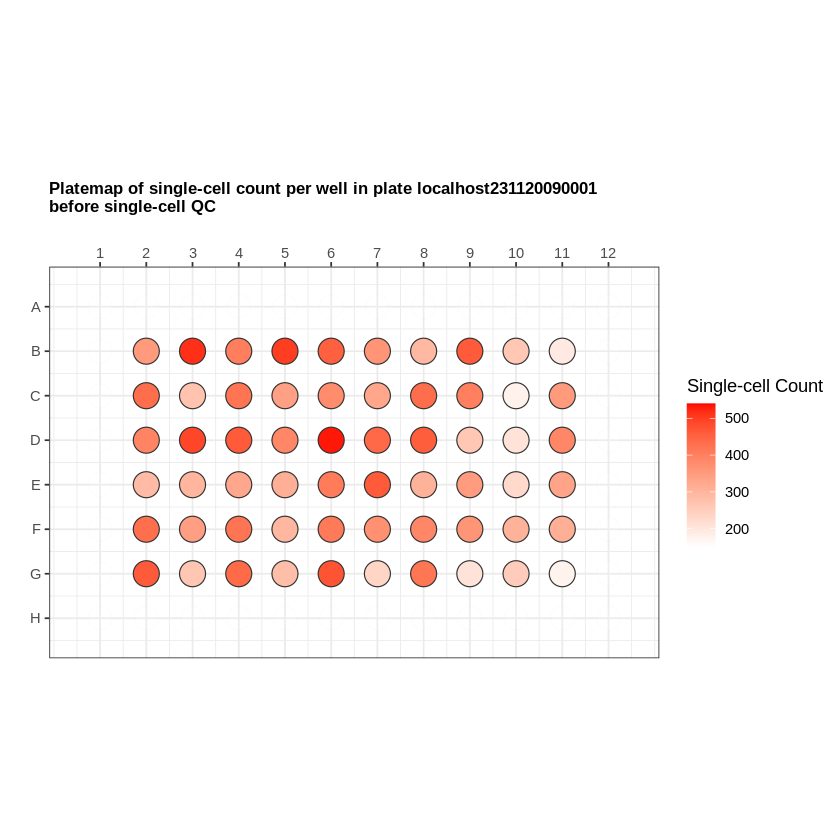

In [4]:
orig_platemap <- platetools::raw_map(
    data = filtered_orig_df$Metadata_Count_Per_Well,
    well = filtered_orig_df$Image_Metadata_Well,
    plate = 96,
    size = 7
    ) +

    ggtitle(paste("Platemap of single-cell count per well in plate localhost231120090001\nbefore single-cell QC")) +
    theme(plot.title = element_text(size = 10, face = "bold")) +
    scale_fill_gradient(name = "Single-cell Count", low = "white", high = "red", limits = c(150, 540))

    ggsave(
    orig_plate4_output_file,
    orig_platemap,
    dpi = 500,
    height = 3.5,
    width = 6
    )

# Display the plot in the notebook
orig_platemap

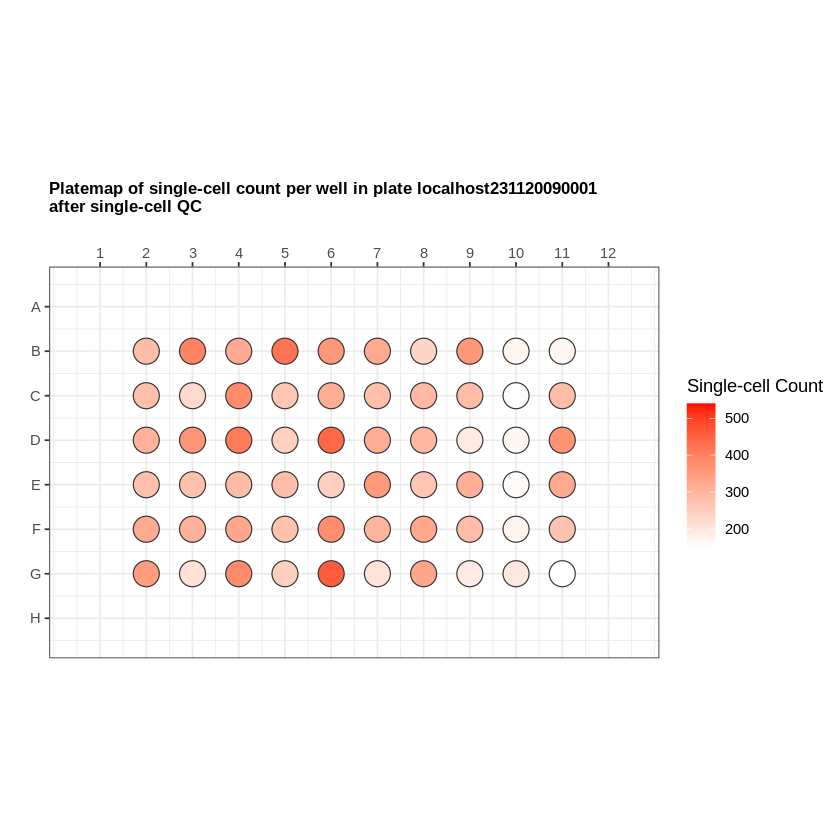

In [5]:
cleaned_platemap <- platetools::raw_map(
    data = filtered_cleaned_df$Metadata_Count_Per_Well,
    well = filtered_cleaned_df$Image_Metadata_Well,
    plate = 96,
    size = 7
    ) +

    ggtitle(paste("Platemap of single-cell count per well in plate localhost231120090001\nafter single-cell QC")) +
    theme(plot.title = element_text(size = 10, face = "bold")) +
    scale_fill_gradient(name = "Single-cell Count", low = "white", high = "red", limits = c(150, 540))

    ggsave(
    clean_plate4_output_file,
    cleaned_platemap,
    dpi = 500,
    height = 3.5,
    width = 6
    )

# Display the plot in the notebook
cleaned_platemap

In [8]:
annot_df <- arrow::read_parquet(file.path("./data/single_cell_profiles/localhost231120090001_sc_annotated.parquet"))

count_failing_healthy <- annot_df %>%
  filter(Metadata_cell_type %in% c("Failing", "Healthy")) %>%
  group_by(Metadata_cell_type) %>%
  summarise(Count = n())

count_failing_healthy

Metadata_cell_type,Count
<chr>,<int>
Failing,11019
Healthy,6370
